In [1]:
import numpy as np
np.random.seed(2017)

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adadelta
from keras.utils import to_categorical

# from keras.utils.visualize_util import plot
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils import model_to_dot

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Image Dimension
input_unit_size = 28*28
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# function to plot digits
def draw_digit(data, row, col, n):
    size = int(np.sqrt(data.shape[0]))
    plt.subplot(row, col, n)    
    plt.imshow(data.reshape(size, size))
    plt.gray()

In [4]:
# Normalize data
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_train /= 255

print('X_train shape:', X_train.shape)

X_train shape: (60000, 784)


***Construction Model***

In [6]:
inputs = Input(shape=(input_unit_size,))
x = Dense(144, activation='relu')(inputs)
outputs = Dense(input_unit_size)(x)
model = Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(loss='mse', optimizer='adadelta')

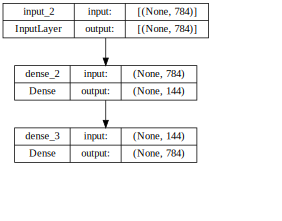

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model.fit(X_train, X_train, epochs=5, batch_size=258)

2023-12-15 09:49:17.092232: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-12-15 09:49:17.347920: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1375
Epoch 2/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1358
Epoch 3/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1342
Epoch 4/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1326
Epoch 5/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1312


**Visualize input layer images**

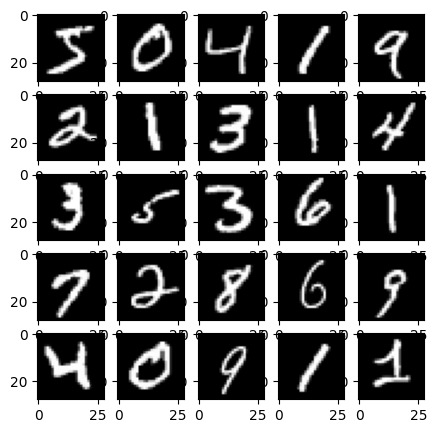

In [11]:
# plot the images from input layer
show_size = 5
total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(X_train[total], show_size, show_size, total+1)
        total+=1
plt.show()

**Visualize hidden layer images (encoded / compressed)**

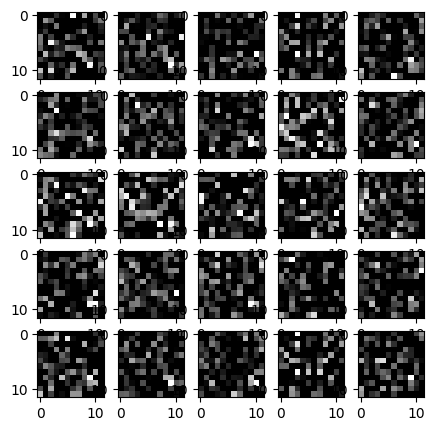

In [13]:
# plot the encoded (compressed) layer image
get_layer_output = K.function([model.layers[0].input], [model.layers[1].output])

hidden_outputs = get_layer_output([X_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(hidden_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

**Visualize output layer images (decoded / de-compressed)**

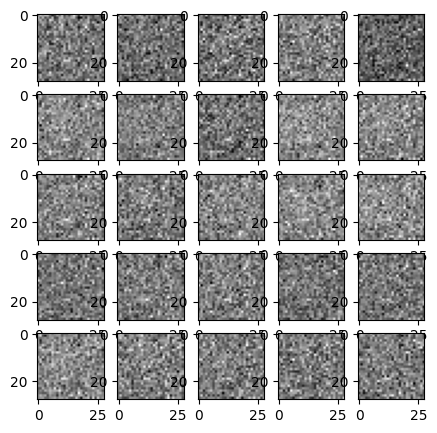

In [14]:
# Plot the decoded (de-compressed) layer images
get_layer_output = K.function([model.layers[0].input], [model.layers[2].output])

last_outputs = get_layer_output([X_train[0:show_size**2]])[0]

total = 0
plt.figure(figsize=(5,5))
for i in range(show_size):
    for j in range(show_size):    
        draw_digit(last_outputs[total], show_size, show_size, total+1)
        total+=1
plt.show()

**Denoise Image**

In [15]:
# Introducing noise to the image
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

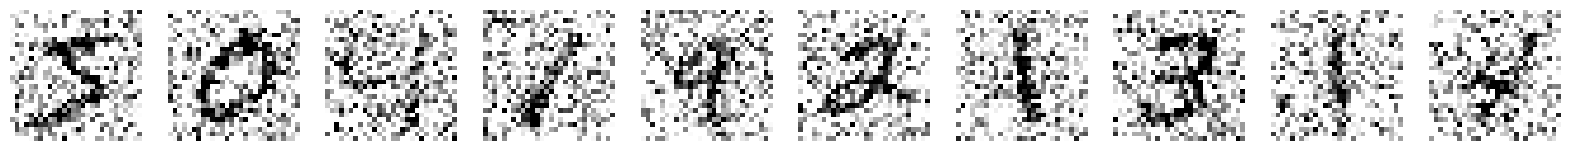

In [16]:
# Function for visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')
    
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train_noisy[i].reshape(28,28), 1, show_size, i+1)
plt.show()

2023-12-15 09:53:17.482885: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-12-15 09:53:17.685565: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1488
Epoch 2/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1452
Epoch 3/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1421
Epoch 4/5
233/233 [==============================] - 1s 3ms/step - loss: 0.1394
Epoch 5/5
 179/1875 [=>............................] - ETA: 0s

2023-12-15 09:53:21.428565: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 621us/step


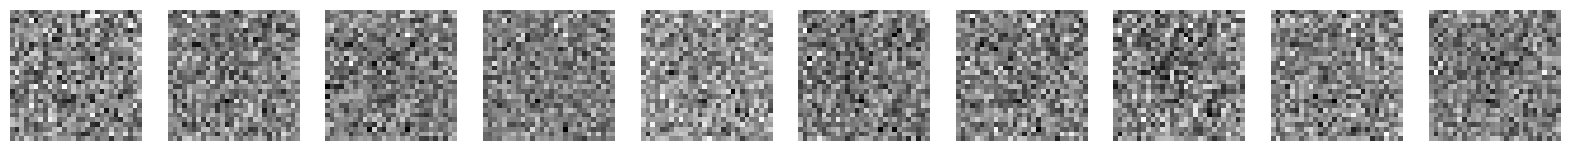

In [18]:
model.fit(X_train_noisy, X_train, epochs=5, batch_size=258)

# Prediction for denoised image
X_train_pred = model.predict(X_train_noisy)

show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train_pred[i].reshape(28,28), 1, show_size, i+1)
plt.show()